### 1. 연도별 친환경자동차 종류별 등록 댓수 비교

### 2. 연령대별 친환경자동차 종류별 등록 댓수 비교


In [510]:
# 모듈 로딩
import pandas as pd

# 파일 변수 선언
DIR_PATH='../Data_이재상/'
FILE_NAME1=(DIR_PATH+"친환경자동차 등록현황.csv")
FILE_NAME2=(DIR_PATH+"친환경자동차 등록현황_2021.csv")
FILE_NAME3=(DIR_PATH+"친환경자동차 등록현황_2020.csv")
FILE_NAME4=(DIR_PATH+"친환경자동차 등록현황_2019.csv")
FILE_NAME5=(DIR_PATH+"친환경자동차 등록현황_2018.csv")
FILE_NAME6=(DIR_PATH+"친환경자동차 등록현황_2017.csv")
FILE_NAME7=(DIR_PATH+"친환경자동차 등록현황_2016.csv")
FILE_NAME8=(DIR_PATH+"친환경자동차 등록현황_2015.csv")

In [511]:
# CSV 파일 로드
carDF1=pd.read_csv(FILE_NAME1)
carDF2=pd.read_csv(FILE_NAME2)
carDF3=pd.read_csv(FILE_NAME3)
carDF4=pd.read_csv(FILE_NAME4)
carDF5=pd.read_csv(FILE_NAME5)
carDF6=pd.read_csv(FILE_NAME6)
carDF7=pd.read_csv(FILE_NAME7)
carDF8=pd.read_csv(FILE_NAME8)

In [512]:
carDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189941 entries, 0 to 189940
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준년월             189941 non-null  object 
 1   사용본거지시읍면동_행정동기준  189930 non-null  object 
 2   차명               189941 non-null  object 
 3   연료               189941 non-null  object 
 4   최초등록일            189941 non-null  object 
 5   현소유자의출생년도        145145 non-null  float64
dtypes: float64(1), object(5)
memory usage: 8.7+ MB


In [513]:
carDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184898 entries, 0 to 184897
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준년월             184898 non-null  object 
 1   사용본거지시읍면동_행정동기준  184887 non-null  object 
 2   차명               184898 non-null  object 
 3   연료               184898 non-null  object 
 4   최초등록일            184898 non-null  object 
 5   현소유자의출생년도        141232 non-null  float64
dtypes: float64(1), object(5)
memory usage: 8.5+ MB


In [514]:
carDF8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35079 entries, 0 to 35078
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준연월             35079 non-null  object 
 1   사용본거지시읍면동_행정동기준  35079 non-null  object 
 2   차명               35079 non-null  object 
 3   연료               35079 non-null  object 
 4   최초등록일            35079 non-null  object 
 5   현소유자의출생년도        24965 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.6+ MB


In [515]:
# carDF8 데이터프레임 컬럼명 변경
carDF8=carDF8.rename(columns={'기준연월':'기준년월'})

# 연도별 데이터 결합
allDF=pd.concat([carDF1,carDF2,carDF3,carDF4,carDF5,carDF6,carDF7,carDF8], ignore_index=True)
allDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852770 entries, 0 to 852769
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준년월             852770 non-null  object 
 1   사용본거지시읍면동_행정동기준  852663 non-null  object 
 2   차명               852770 non-null  object 
 3   연료               852770 non-null  object 
 4   최초등록일            852770 non-null  object 
 5   현소유자의출생년도        643966 non-null  float64
dtypes: float64(1), object(5)
memory usage: 39.0+ MB


In [516]:
# 중복 데이터 제거
carDF=allDF.drop_duplicates(subset=['사용본거지시읍면동_행정동기준','차명','연료','최초등록일','현소유자의출생년도'],ignore_index=True)
carDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260385 entries, 0 to 260384
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준년월             260385 non-null  object 
 1   사용본거지시읍면동_행정동기준  260353 non-null  object 
 2   차명               260385 non-null  object 
 3   연료               260385 non-null  object 
 4   최초등록일            260385 non-null  object 
 5   현소유자의출생년도        222936 non-null  float64
dtypes: float64(1), object(5)
memory usage: 11.9+ MB


In [517]:
carDF.isnull().sum()

기준년월                   0
사용본거지시읍면동_행정동기준       32
차명                     0
연료                     0
최초등록일                  0
현소유자의출생년도          37449
dtype: int64

In [518]:
# '현소유자의출생년도' 컬럼 결측치 데이터 제거
carDF=carDF.dropna(axis=0, subset=['현소유자의출생년도'])

# 연료 데이터 종류 확인
carDF['연료'].value_counts()

하이브리드(휘발유+전기)    190893
전기                23505
하이브리드(LPG+전기)      4191
수소                 2274
하이브리드(경유+전기)       2073
Name: 연료, dtype: int64

In [519]:
# 하이브리드로 통일하기 위해 연료 컬럼의 데이터 변경
carDF=carDF.replace(['하이브리드(휘발유+전기)',
                     '하이브리드(경유+전기)',
                     '하이브리드(LPG+전기)',
                     '하이브리드(CNG+전기)'], '하이브리드')

In [520]:
# 최초등록일 컬럼을 연도만 나오도록 추출
carDF['최초등록일']=carDF['최초등록일'].str.slice(start=0,stop=4)
carDF.최초등록일=carDF.최초등록일.astype(int)

# 최초등록일과 출생년도 간에 차이를 통해 당시 연령 추출
carDF['연령']=carDF.최초등록일-carDF.현소유자의출생년도+1
carDF.연령=carDF.연령.astype(int)

# 데이터 분류를 위해 연령을 연령대로 산출
carDF['연령대']=(carDF['연령']//10)*10

# 불필요 데이터 제거
carDF=carDF.drop(carDF[(carDF['최초등록일']==2022)|(carDF['최초등록일']==1295)].index)
carDF=carDF.drop(carDF[(carDF['연령대']<=0)|(carDF['연령대']>=100)].index)
carDF=carDF.drop(carDF[(carDF['최초등록일']>=2004)&(carDF['최초등록일']<=2008)].index)
carDF

,기준년월,사용본거지시읍면동_행정동기준,차명,연료,최초등록일,현소유자의출생년도,연령,연령대
0,22-Feb,서울특별시 구로구 신도림동,K7 하이브리드,하이브리드,2014,1967.0,48,40
1,22-Feb,서울특별시 구로구 신도림동,토요타 Prius V,하이브리드,2017,1980.0,38,30
2,22-Feb,서울특별시 구로구 신도림동,니로 하이브리드,하이브리드,2018,1990.0,29,20
3,22-Feb,서울특별시 구로구 신도림동,투싼 하이브리드(TUCSON HYBRI,하이브리드,2021,1981.0,41,40
4,22-Feb,서울특별시 구로구 신도림동,토요타 PRIUS,하이브리드,2012,1983.0,30,30
...,...,...,...,...,...,...,...,...
260380,Dec-15,서울특별시 도봉구 방학1동,K5 하이브리드,하이브리드,2012,1960.0,53,50
260381,Dec-15,서울특별시 도봉구 방학2동,토요타 Camry Hybrid,하이브리드,2014,1967.0,48,40
260382,Dec-15,서울특별시 도봉구 방학3동,쏘나타(SONATA) 하이브리드,하이브리드,2014,1982.0,33,30
260383,Dec-15,서울특별시 강서구 가양2동,아반떼 하이브리드(AVANTE HYB,하이브리드,2009,1969.0,41,40


In [521]:
# 등록일별 친환경자동차 집계
carDF.groupby('연료')['최초등록일'].agg(**{'차량 수':'count'}).reset_index()
countDF=carDF.groupby(['연료','최초등록일'])['차명'].agg(**{'차량 수':'count'}).reset_index()
countDF.set_index(['최초등록일'],inplace=True)

# 연료별 데이터프레임 생성
hDF=countDF[countDF['연료']=='수소']
hDF=hDF['차량 수']
eDF=countDF[countDF['연료']=='전기']
eDF=eDF['차량 수']
hyDF=countDF[countDF['연료']=='하이브리드']
hyDF=hyDF['차량 수']

# 연료별 데이터프레임 결합
concatDF=pd.concat([hDF,eDF,hyDF],axis=1,keys=['수소','전기','하이브리드'])
concatDF=concatDF.sort_index(ascending=True)
concatDF

,수소,전기,하이브리드
최초등록일,,,
2009,NaN,NaN,2106
2010,NaN,2.0,2619
2011,NaN,11.0,5884
2012,NaN,19.0,11625
2013,NaN,78.0,8890
2014,NaN,175.0,10850
2015,NaN,524.0,12653
2016,6.0,333.0,20013
2017,3.0,1105.0,23014


In [522]:
# 연령대별 친환경자동차 집계
carDF.groupby('연료')['연령대'].agg(**{'차량 수':'count'}).reset_index()
ageDF=carDF.groupby(['연료','연령대'])['차명'].agg(**{'차량 수':'count'}).reset_index()
ageDF.set_index(['연령대'],inplace=True)

# 연료별 데이터프레임 생성
h_ageDF=ageDF[ageDF['연료']=='수소']
h_ageDF=h_ageDF['차량 수']
e_ageDF=ageDF[ageDF['연료']=='전기']
e_ageDF=e_ageDF['차량 수']
hy_ageDF=ageDF[ageDF['연료']=='하이브리드']
hy_ageDF=hy_ageDF['차량 수']

# 연료별 데이터프레임 결합
concat_ageDF=pd.concat([h_ageDF,e_ageDF,hy_ageDF],axis=1,keys=['수소','전기','하이브리드'])
concat_ageDF=concat_ageDF.sort_index(ascending=True)
concat_ageDF

,수소,전기,하이브리드
연령대,,,
10,NaN,21,468
20,58.0,1012,16072
30,391.0,6214,60766
40,696.0,7130,52578
50,714.0,4632,39503
60,324.0,3339,18405
70,68.0,864,3915
80,13.0,74,521
90,1.0,3,49


In [523]:
# 모듈 로딩
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib 한글 Font 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path='../Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [524]:
# 인덱스 확인
concatDF.index, concat_ageDF.index

(Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             2020, 2021],
            dtype='int64', name='최초등록일'),
 Int64Index([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype='int64', name='연령대'))

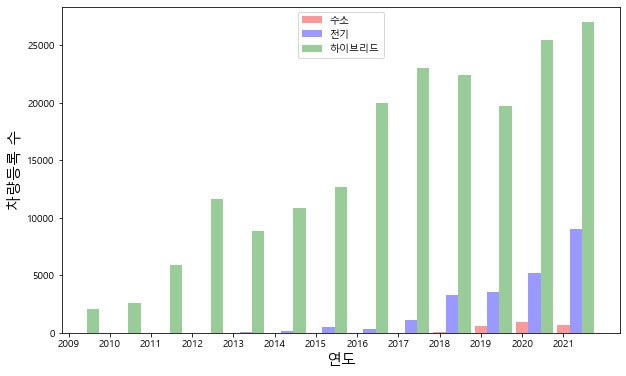

In [525]:
# 연도별 차량등록 수
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(10,6))
bar_width = 0.3
year=[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(13)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, concatDF['수소'], bar_width, alpha=0.4, color='red', label='수소')

b2 = plt.bar(index + bar_width, concatDF['전기'], bar_width,alpha=0.4, color='blue', label='전기')

b3 = plt.bar(index + 2* bar_width, concatDF['하이브리드'], bar_width,alpha=0.4, color='green', label='하이브리드')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(index,year)

# x축, y축 이름 
plt.xlabel('연도', size = 15)
plt.ylabel('차량등록 수', size = 15)

# 범례 설정
plt.legend()

plt.show()

  - 수소차를 제외한 친환경자동차 수가 증가하는 추세
  - 전기차는 최근 들어 급속도로 증가하는 추세

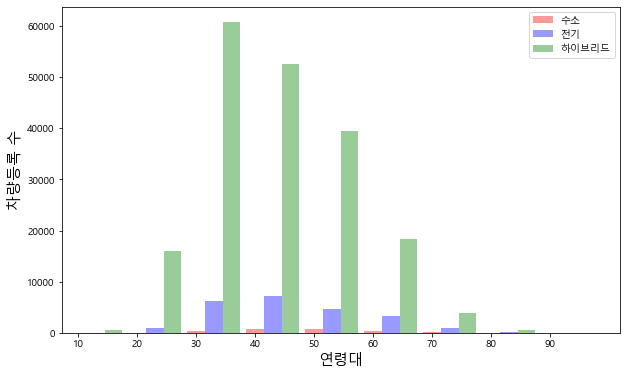

In [526]:
# 연령대별 친환경 자동차 종류
# 그래프 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(10,6))
bar_width = 0.3
age=[10, 20, 30, 40, 50, 60, 70, 80, 90]

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(9)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, concat_ageDF['수소'], bar_width, alpha=0.4, color='red', label='수소')

b2 = plt.bar(index + bar_width, concat_ageDF['전기'], bar_width,alpha=0.4, color='blue', label='전기')

b3 = plt.bar(index + 2* bar_width, concat_ageDF['하이브리드'], bar_width,alpha=0.4, color='green', label='하이브리드')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(index,age)

# x축, y축 이름
plt.xlabel('연령대', size = 15)
plt.ylabel('차량등록 수', size = 15)

# 범례 설정
plt.legend()

plt.show()

  - 하이브리드차는 30~50대가 가장 많이 구매함
  - 전기차 또한 30~50대가 가장 많이 구매함
  - 도입 단계인 친환경자동차의 특성 상 판매가가 고가이므로 사회진입단계인 20대의 등록 수가 적은 것으로 예상됨